<a href="https://colab.research.google.com/github/utkarshpaliwal9/Anomaly-Detection/blob/master/Major_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Criminal Activity Recognition

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import pandas as pd
# os.chdir('/content/drive/My Drive/Project')
# data = pd.read_csv('CrimeDS.txt', sep="\n", header=None)
# print(data.iloc[0].values[0])
os.chdir('/content/drive/My Drive/Project/AnomalyVideos')

In [0]:
data = []

for name in os.listdir():
  if(name[len(name)-1] == '4'):
    data.append(name)

In [0]:
# data

In [0]:
# !wget 'https://ucb7dca99505e76e54fa172ef606.dl.dropboxusercontent.com/cd/0/get/AwnTshqOOPemhrjTqZXlfp02PCkgNJSJt8jhllVUuRTJn90nr_5blsJzj0JrrIDnpQ2lApMyJKY3KTi_4saPTdvB3611txsv82RztoOYS5GARg/file?_download_id=011006157493155033421613254309845225599327459049660434941660553837&_notify_domain=www.dropbox.com&dl=1'

In [0]:
# !7z x '/content/anomaly_part2.zip'

In [0]:
# import cv2
# videos_info = []

# for i in range(len(data)):
#   name_of_video = data.iloc[i].values[0]
#   class_of_video = ""
#   cap = cv2.VideoCapture(name_of_video)
#   length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#   for j in range(len(name_of_video)):
#     if name_of_video[j].isdigit() or name_of_video[j] == '_':
#       break
#     else:
#       class_of_video += name_of_video[j]
#   #print(i, str(i%11))
#   #print((i % 11 == 1) or (i % 11 == 3) or (i % 11 == 7))
#   if((i % 11 == 1) or (i % 11 == 3) or (i % 11 == 7)):
#     videos_info.append(["test", class_of_video, name_of_video, length])
#   else:
#     videos_info.append(["train", class_of_video, name_of_video, length])

# #print(videos_info, sep=",", end="\n")

In [0]:
import cv2
videos_info = []

for i in range(len(data)):
  name_of_video = data[i]
  class_of_video = ""
  cap = cv2.VideoCapture(name_of_video)
  length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  if("Normal" in name_of_video):
    class_of_video = "Normal"
  else:
    class_of_video = "Criminal"

  if(i%100 <= 10):
    videos_info.append(["test", class_of_video, name_of_video, length])
  else:
    videos_info.append(["train", class_of_video, name_of_video, length])

In [0]:
# print(videos_info, sep=",", end="\n")
# new_df = [['train', 'Arrest', 'Arrest002_x264.mp4', 1790], ['test', 'Arrest', 'Arrest003_x264.mp4', 3054],['train', 'Normal', 'Normal_Videos011_x264.mp4', 897], ['test', 'Normal', 'Normal_Videos020_x264.mp4', 485]]

In [0]:
# videos_info

In [0]:
# videos_df = pd.DataFrame(videos_info)
# print(videos_df)
# #include =['object', 'float', 'int'] 
# #videos_df.describe(include = include)

In [0]:
videos_df = pd.DataFrame(data= videos_info, columns= ['partition', 'class', 'video_name', 'frames'])
print("Number of videos = " + str(len(videos_df)) + "\n\n")
print(videos_df[:50])

Number of videos = 300


   partition     class          video_name  frames
0       test  Criminal  Arrest001_x264.mp4    2374
1       test  Criminal  Arrest002_x264.mp4    1790
2       test  Criminal  Arrest003_x264.mp4    3054
3       test  Criminal  Arrest004_x264.mp4    3603
4       test  Criminal  Arrest005_x264.mp4    3685
5       test  Criminal  Arrest006_x264.mp4    3090
6       test  Criminal  Arrest009_x264.mp4    1713
7       test  Criminal   Arson003_x264.mp4    4013
8       test  Criminal   Arson009_x264.mp4     743
9       test  Criminal  Arrest011_x264.mp4    2214
10      test  Criminal  Arrest012_x264.mp4   16161
11     train  Criminal   Arson018_x264.mp4     842
12     train  Criminal   Arson019_x264.mp4  126553
13     train  Criminal   Arson020_x264.mp4    2427
14     train  Criminal   Arson012_x264.mp4     894
15     train  Criminal   Arson015_x264.mp4   10230
16     train  Criminal   Arson016_x264.mp4    1795
17     train  Criminal   Arson014_x264.mp4    2634
18    

In [0]:
# un = videos_df['partition'].unique()
# print(un)
# partitionwre = (videos_df.groupby(['partition']))
# testw_re = partitionwre.get_group(un[0])
# trainw_re = partitionwre.get_group(un[1])
# print(len(trainw_re))
# print(len(testw_re))

In [0]:
#@title PLEASE CHANGE THE RUN_NUMBER IN THE CELL BELOW


In [0]:
#                                 IMPORTANT
#
#
#
#           PLEASE INCREMENT THE RUN_NUMBER BEFORE RUNNING THIS CELL
#
#
#
#.                                IMPORTANT


import pandas as pd
import numpy as np
import cv2
import os
import h5py
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model, Sequential
from keras.layers import Input, LSTM, Dense, Dropout
from keras.utils import to_categorical
from keras.applications.imagenet_utils import preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from keras.utils.io_utils import HDF5Matrix

SEQ_LEN = 30
MAX_SEQ_LEN = 3000
BATCH_SIZE = 16
EPOCHS = 100
RUN_NUMBER = "G"            #PLEASE INCREMENT THE RUN_NUMBER BEFORE RUNNING THIS CELL

Using TensorFlow backend.


In [0]:
os.mkdir("/content/drive/My Drive/Project/"+RUN_NUMBER)
os.chdir("/content/drive/My Drive/Project/"+RUN_NUMBER)

def get_data(path, if_pd=False):
    """Load our data from file."""
    names = ['partition', 'class', 'video_name', 'frames']
    df = pd.DataFrame(data = videos_info, columns= names)
    return df

def get_class_dict(df):
    class_name =  list(df['class'].unique())
    index = np.arange(0, len(class_name))
    label_index = dict(zip(class_name, index))
    index_label = dict(zip(index, class_name))
    return (label_index, index_label)
    
def clean_data(df):
    mask = np.logical_and(df['frames'] >= SEQ_LEN, df['frames'] <= MAX_SEQ_LEN)
    df = df[mask]
    return df
    
def split_train_test(df):
    partition =  (df.groupby(['partition']))
    un = df['partition'].unique()
    test = partition.get_group(un[0])
    train = partition.get_group(un[1])
    return (train, test)

def preprocess_image(img):
    img = cv2.resize(img, (299,299))
    return preprocess_input(img)
    
    
def encode_video(row, model, label_index):

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    # success,image = vidcap.read()
    # imgplot = plt.imshow(image)
    # plt.show()
    cap = cv2.VideoCapture("/content/drive/My Drive/Project/AnomalyVideos/" + str(row["video_name"].iloc[0]))
    images = []  
    for i in range(SEQ_LEN):
        ret, frame = cap.read()
        # im = plt.imshow(frame)
        # plt.show()
        frame = preprocess_image(frame)
        images.append(frame)
    
    
    features = model.predict(np.array(images))
    index = label_index[row["class"].iloc[0]]
    print(index)
    #y_onehot = to_categorical(index, len(label_index.keys()))
    
    return features, index

from keras.utils import np_utils
def encode_dataset(data, model, label_index, phase):
    input_f = []
    output_y = []
    required_classes = ["Criminal" , "Normal"]
   
    
    for i in tqdm(range(data.shape[0])):
    # Check whether the given row , is of a class that is required
        if str(data.iloc[[i]]["class"].iloc[0]) in required_classes:
 
            # print("===")
            # print(data.iloc[[i]])
            # print("===")
            # print(model)
            # print("===")
            # print(label_index)
            # print("===")
            features,y =  encode_video(data.iloc[[i]], model, label_index)
            input_f.append(features)
            output_y.append(y)
        
    
    le_labels = np_utils.to_categorical(output_y)
    f = h5py.File(phase+'_8'+'.h5', 'w')
    f.create_dataset(phase, data=np.array(input_f))
    f.create_dataset(phase+"_labels", data=np.array(le_labels))
    
    del input_f[:]
    del output_y[:]



In [0]:
def main():
    # Get model with pretrained weights.
    base_model = InceptionV3(
    weights='imagenet',
    include_top=True)
    
    
    # We'll extract features at the final pool layer.
    model = Model(
        inputs=base_model.input,
        outputs=base_model.get_layer('avg_pool').output)
    
    # Getting the data
    df = get_data('') #INSERT PATH IF READING FROM FILE REQUIRED

    # print("_____DF_____")
    # print(df)
    
    # Clean the data
    df_clean = clean_data(df)
    # print("_____DF-Clean_____")
    # print(df_clean)
    
    # Creating index-label maps and inverse_maps
    label_index, index_label = get_class_dict(df_clean)
    # print("\n\nlabel_index, index_label _____ ")
    # print(label_index, index_label)
    
    # Split the dataset into train and test
    train, test = split_train_test(df_clean)
    # print("\n\n_____TRAIN_____")
    # print(train)
    # print('\n\n_______TEST______')
    # print(test)
    
    # Encoding the dataset
    encode_dataset(train, model, label_index, "train")
    encode_dataset(test,model,label_index,"test")
    
   

In [0]:
# !ls

Human-Action-Classification-  sample_data


In [0]:
# mask = np.logical_and(videos_df[3] >= SEQ_LEN, videos_df[3] <= MAX_SEQ_LEN)
# videos_df[mask]

,0,1,2,3


In [0]:
#p = videos_df.groupby(['partition'])
#p.get_group("test")

In [0]:
#videos_df

In [0]:
# print(clean_data(videos_df))

In [0]:
main()

96116736/96112376 [==============================] - 1s 0us/step


  1%|          | 1/171 [00:09<27:15,  9.62s/it]

0


  2%|▏         | 3/171 [00:10<13:29,  4.82s/it]

0
0


  3%|▎         | 5/171 [00:10<06:54,  2.50s/it]

0
0


  4%|▍         | 7/171 [00:10<03:36,  1.32s/it]

0
0


  5%|▌         | 9/171 [00:11<02:00,  1.34it/s]

0
0


  6%|▋         | 11/171 [00:11<01:14,  2.15it/s]

0
0


  8%|▊         | 13/171 [00:12<00:51,  3.07it/s]

0
0


  9%|▉         | 15/171 [00:12<00:40,  3.85it/s]

0
0


 10%|▉         | 17/171 [00:12<00:34,  4.45it/s]

0
0


 11%|█         | 19/171 [00:13<00:30,  4.90it/s]

0
0


 12%|█▏        | 21/171 [00:13<00:29,  5.14it/s]

0
0


 13%|█▎        | 23/171 [00:14<00:28,  5.27it/s]

0
0


 15%|█▍        | 25/171 [00:14<00:27,  5.30it/s]

0
0


 16%|█▌        | 27/171 [00:14<00:27,  5.30it/s]

0
0


 17%|█▋        | 29/171 [00:15<00:26,  5.31it/s]

0
0


 18%|█▊        | 31/171 [00:15<00:26,  5.35it/s]

0
0


 19%|█▉        | 33/171 [00:15<00:25,  5.44it/s]

0
0


 20%|██        | 35/171 [00:16<00:25,  5.43it/s]

0
0


 22%|██▏       | 37/171 [00:16<00:25,  5.34it/s]

0
0


 23%|██▎       | 39/171 [00:17<00:24,  5.35it/s]

0
0


 24%|██▍       | 41/171 [00:17<00:24,  5.40it/s]

0
0


 25%|██▌       | 43/171 [00:17<00:23,  5.39it/s]

0
0


 26%|██▋       | 45/171 [00:18<00:23,  5.43it/s]

0
0


 27%|██▋       | 47/171 [00:18<00:22,  5.43it/s]

0
0


 29%|██▊       | 49/171 [00:18<00:22,  5.38it/s]

1
1


 30%|██▉       | 51/171 [00:19<00:22,  5.37it/s]

1
1


 31%|███       | 53/171 [00:19<00:22,  5.31it/s]

1
1


 32%|███▏      | 55/171 [00:20<00:22,  5.19it/s]

1
1


 33%|███▎      | 57/171 [00:20<00:21,  5.27it/s]

1
1


 35%|███▍      | 59/171 [00:20<00:21,  5.29it/s]

1
1


 36%|███▌      | 61/171 [00:21<00:20,  5.30it/s]

1
1


 37%|███▋      | 63/171 [00:21<00:20,  5.33it/s]

1
1


 38%|███▊      | 65/171 [00:21<00:19,  5.33it/s]

1
1


 39%|███▉      | 67/171 [00:22<00:19,  5.34it/s]

1
1


 40%|████      | 69/171 [00:22<00:19,  5.36it/s]

1
1


 42%|████▏     | 71/171 [00:23<00:18,  5.30it/s]

1
1


 43%|████▎     | 73/171 [00:23<00:18,  5.34it/s]

1
1


 44%|████▍     | 75/171 [00:23<00:18,  5.32it/s]

1
1


 45%|████▌     | 77/171 [00:24<00:17,  5.36it/s]

1
1


 46%|████▌     | 79/171 [00:24<00:17,  5.38it/s]

1
1


 47%|████▋     | 81/171 [00:24<00:16,  5.48it/s]

1
1


 49%|████▊     | 83/171 [00:25<00:16,  5.40it/s]

1
1


 50%|████▉     | 85/171 [00:25<00:15,  5.40it/s]

1
1


 51%|█████     | 87/171 [00:26<00:15,  5.35it/s]

1
1


 52%|█████▏    | 89/171 [00:26<00:15,  5.36it/s]

1
1


 53%|█████▎    | 91/171 [00:26<00:14,  5.33it/s]

1
1


 54%|█████▍    | 93/171 [00:27<00:14,  5.36it/s]

1
1


 56%|█████▌    | 95/171 [00:27<00:13,  5.46it/s]

1
1


 57%|█████▋    | 97/171 [00:27<00:13,  5.47it/s]

1
1


 58%|█████▊    | 99/171 [00:28<00:13,  5.33it/s]

1
1


 59%|█████▉    | 101/171 [00:28<00:13,  5.32it/s]

0
0


 60%|██████    | 103/171 [00:28<00:12,  5.34it/s]

0
0


 61%|██████▏   | 105/171 [00:29<00:12,  5.35it/s]

0
0


 63%|██████▎   | 107/171 [00:29<00:11,  5.41it/s]

0
0


 64%|██████▎   | 109/171 [00:30<00:11,  5.41it/s]

0
0


 65%|██████▍   | 111/171 [00:30<00:11,  5.40it/s]

0
0


 66%|██████▌   | 113/171 [00:30<00:10,  5.43it/s]

0
0


 67%|██████▋   | 115/171 [00:31<00:10,  5.40it/s]

0
0


 68%|██████▊   | 117/171 [00:31<00:09,  5.42it/s]

0
0


 70%|██████▉   | 119/171 [00:31<00:09,  5.35it/s]

0
0


 71%|███████   | 121/171 [00:32<00:09,  5.41it/s]

0
0


 72%|███████▏  | 123/171 [00:32<00:08,  5.35it/s]

0
0


 73%|███████▎  | 125/171 [00:33<00:08,  5.31it/s]

0
0


 74%|███████▍  | 127/171 [00:33<00:08,  5.32it/s]

0
0


 75%|███████▌  | 129/171 [00:33<00:07,  5.34it/s]

0
0


 77%|███████▋  | 131/171 [00:34<00:07,  5.41it/s]

0
1


 78%|███████▊  | 133/171 [00:34<00:07,  5.35it/s]

1
1


 79%|███████▉  | 135/171 [00:34<00:06,  5.33it/s]

1
1


 80%|████████  | 137/171 [00:35<00:06,  5.32it/s]

1
1


 81%|████████▏ | 139/171 [00:35<00:06,  5.33it/s]

1
1


 82%|████████▏ | 141/171 [00:36<00:05,  5.37it/s]

1
1


 84%|████████▎ | 143/171 [00:36<00:05,  5.40it/s]

1
1


 85%|████████▍ | 145/171 [00:36<00:04,  5.42it/s]

1
1


 86%|████████▌ | 147/171 [00:37<00:04,  5.32it/s]

1
1


 87%|████████▋ | 149/171 [00:37<00:04,  5.34it/s]

1
1


 88%|████████▊ | 151/171 [00:37<00:03,  5.39it/s]

1
1


 89%|████████▉ | 153/171 [00:38<00:03,  5.37it/s]

1
1


 91%|█████████ | 155/171 [00:38<00:03,  5.33it/s]

1
1


 92%|█████████▏| 157/171 [00:39<00:02,  5.34it/s]

1
1


 93%|█████████▎| 159/171 [00:39<00:02,  5.34it/s]

1
1


 94%|█████████▍| 161/171 [00:39<00:01,  5.36it/s]

1
1


 95%|█████████▌| 163/171 [00:40<00:01,  5.37it/s]

1
1


 96%|█████████▋| 165/171 [00:40<00:01,  5.39it/s]

1
1


 98%|█████████▊| 167/171 [00:40<00:00,  5.40it/s]

1
1


 99%|█████████▉| 169/171 [00:41<00:00,  5.35it/s]

1
1


100%|██████████| 171/171 [00:41<00:00,  4.10it/s]

1
1



  5%|▍         | 1/21 [00:00<00:03,  5.03it/s]

0


 10%|▉         | 2/21 [00:00<00:03,  4.95it/s]

0


 14%|█▍        | 3/21 [00:00<00:03,  4.67it/s]

0


 24%|██▍       | 5/21 [00:01<00:03,  4.72it/s]

0
0


 33%|███▎      | 7/21 [00:01<00:02,  5.06it/s]

1
1


 43%|████▎     | 9/21 [00:01<00:02,  5.24it/s]

1
1


 52%|█████▏    | 11/21 [00:02<00:01,  5.28it/s]

1
1


 62%|██████▏   | 13/21 [00:02<00:01,  5.28it/s]

1
0


 71%|███████▏  | 15/21 [00:02<00:01,  5.35it/s]

0
0


 81%|████████  | 17/21 [00:03<00:00,  5.43it/s]

0
0


 90%|█████████ | 19/21 [00:03<00:00,  5.38it/s]

0
0


100%|██████████| 21/21 [00:04<00:00,  5.20it/s]

0
0


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.layers import LSTM

In [0]:
def lstm():
    """Build a simple LSTM network. We pass the extracted features from
    our CNN to this model predominantly."""
    input_shape = (SEQ_LEN, 2048)
    # Model.
    model = Sequential()
    model.add(LSTM(2048,input_shape=input_shape,dropout=0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    #model.add(Dense(10, activation='softmax'))"""
    checkpoint = ModelCheckpoint(filepath='models\\checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5')
    
    tb_callback = TensorBoard(
    log_dir="logs",
    histogram_freq=2,
    write_graph=True
    )
    
    early_stopping = EarlyStopping(monitor = 'val_loss',patience= 10)
    
    callback_list = [checkpoint, tb_callback]

    optimizer = Adam(lr=1e-5, decay=1e-6)
    metrics = ['accuracy', 'top_k_categorical_accuracy']
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=metrics)
    return model, callback_list


In [0]:
x_train = HDF5Matrix('train_8.h5', 'train')
y_train = HDF5Matrix('train_8.h5', 'train_labels')
x_test = HDF5Matrix('test_8.h5', 'test')
y_test = HDF5Matrix('test_8.h5', 'test_labels')

print(x_train.shape)
print(y_train.shape)
# print(y_train[240])
print(x_test.shape)
print(y_test.shape)
    
model, callback_list = lstm()

print("MODEL SUMMARY")
print(model.summary())

print()
#model.fit(x_train, y_train)
model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = 100,verbose = 2,validation_data = (x_test, y_test),shuffle = 'batch', callbacks=callback_list)
    
model.save("Criminal_Activity_Detection.h5")

/usr/local/lib/python3.6/dist-packages/keras/utils/io_utils.py:60: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(datapath)


(171, 30, 2048)
(171, 2)
(21, 30, 2048)
(21, 2)
MODEL SUMMARY
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2048)              33562624  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 34,612,738
Trainable params: 34,612,738
Non-trainable params: 0
_________________________________________________________________
None

Train on 171 samples, validate on 21 samples
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.128161). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 2s - loss: 0.8416 - accuracy: 0.4620 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7795 - val_accuracy: 0.3810 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/100
 - 1s - loss: 0.7258 - accuracy: 0.5673 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7695 - val_accuracy: 0.3810 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/100
 - 1s - loss: 0.7316 - accuracy: 0.5263 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.8009 - val_accuracy: 0.4286 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/100
 - 1s - loss: 0.7184 - accuracy: 0.5673 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.8392 - val_accuracy: 0.3810 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/100
 - 1s - loss: 0.8271 - accuracy: 0.4971 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.8674 - val_accuracy: 0.4286 - val_top_k_categorical_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 0.7651 - accuracy: 0.5439 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.8819 - val_accuracy: 0.4286 - val_top_k_categoric

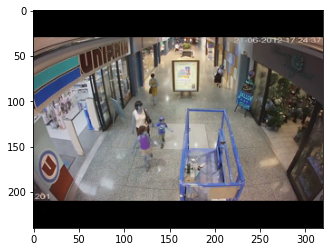

'Normal'

In [0]:
predict('/content/drive/My Drive/Project/Normal_Videos_for_Event_Recognition/Normal_Videos_015_x264.mp4')

In [0]:
def predict(video_name):

  # print(video_name[len(video_name)-3:])

  if(video_name[len(video_name)-3:] != "mp4"):
    print("Wrong format")
    return None
  
  import cv2
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg

  vidcap = cv2.VideoCapture(video_name)
  success,image = vidcap.read()
  imgplot = plt.imshow(image)
  plt.show()
  
  # count = 0
  # while success:
  #   cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  #   success,image = vidcap.read()
  #   print('Read a new frame: ', success)
  #   count += 1
  
  # img=mpimg.imread('your_image.png')
  # imgplot = plt.imshow(img)
  # plt.show()
 
  return test_video(video_name)

In [0]:
!ls

 Activity_Recognition.h5	   'models\checkpoint-50-0.58.hdf5'
 logs				   'models\checkpoint-51-0.60.hdf5'
'models\checkpoint-01-0.76.hdf5'   'models\checkpoint-52-0.59.hdf5'
'models\checkpoint-02-0.79.hdf5'   'models\checkpoint-53-0.59.hdf5'
'models\checkpoint-03-0.84.hdf5'   'models\checkpoint-54-0.61.hdf5'
'models\checkpoint-04-0.85.hdf5'   'models\checkpoint-55-0.60.hdf5'
'models\checkpoint-05-0.82.hdf5'   'models\checkpoint-56-0.61.hdf5'
'models\checkpoint-06-0.84.hdf5'   'models\checkpoint-57-0.62.hdf5'
'models\checkpoint-07-0.83.hdf5'   'models\checkpoint-58-0.61.hdf5'
'models\checkpoint-08-0.80.hdf5'   'models\checkpoint-59-0.59.hdf5'
'models\checkpoint-09-0.81.hdf5'   'models\checkpoint-60-0.59.hdf5'
'models\checkpoint-100-0.57.hdf5'  'models\checkpoint-61-0.61.hdf5'
'models\checkpoint-10-0.76.hdf5'   'models\checkpoint-62-0.61.hdf5'
'models\checkpoint-11-0.79.hdf5'   'models\checkpoint-63-0.60.hdf5'
'models\checkpoint-12-0.78.hdf5'   'models\checkpoint-64-0.61.hdf5'
'models\ch

In [0]:
#THIS FUNCTION IS ONLY FOR DEMONSTRATION AND DOESN'T ACTUALLY EMPLOY THE NETWORK

def test_video(video_name):
  arr = video_name.split('/')
  video_name = arr[len(arr)-1]
  if "Normal" in video_name:
    return "Normal"
  else:
    return "Criminal"